<a href="https://colab.research.google.com/github/Adj95/python_dsc/blob/main/Titanic_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [588]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler , FunctionTransformer , LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer , MissingIndicator
from sklearn.model_selection import cross_val_score

In [589]:
data = pd.read_csv("/content/train (1).csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [590]:
x = data.drop(columns='Survived', axis=1)
y = data['Survived']

# feature construction awith sibsp , parch and name

In [591]:
x['family'] = x['SibSp'] + x['Parch']
x.drop(['SibSp','Parch'],axis=1,inplace=True)

In [592]:
def myfunc(num):
  if num == 1:
    return 0
  elif num > 1 and num <= 4:
    return 1
  else:
    return 2

x['family_size'] = x['family'].apply(myfunc)
x.drop(columns=['family'], inplace=True)

In [593]:
x['Title']  =  x['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
x.drop(columns=['Name'], inplace=True)

In [594]:
x.head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,family_size,Title
0,1,3,male,22.0,A/5 21171,7.2500,NaN,S,0,Mr
1,2,1,female,38.0,PC 17599,71.2833,C85,C,0,Mrs
2,3,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,2,Miss
3,4,1,female,35.0,113803,53.1000,C123,S,0,Mrs
4,5,3,male,35.0,373450,8.0500,NaN,S,2,Mr


In [595]:
x.isnull().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,177
Ticket,0
Fare,0
Cabin,687
Embarked,2
family_size,0
Title,0


# Handling Missing data

we can handle age missing values by mean /random imputation / missing indicator

In [596]:
mi =MissingIndicator()
mi.fit(x[['Age']])
x['missing_age'] = mi.transform(x[['Age']])

si =SimpleImputer(strategy='mean')
x['Age'] = si.fit_transform(x[['Age']])


x['Embarked'].fillna(x['Embarked'].mode()[0],inplace=True)
x.drop(columns='Cabin',inplace=True)

x.drop(columns='Ticket',inplace=True)
x.head()

/tmp/ipython-input-596-323426927.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x['Embarked'].fillna(x['Embarked'].mode()[0],inplace=True)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,family_size,Title,missing_age
0,1,3,male,22.0,7.2500,S,0,Mr,False
1,2,1,female,38.0,71.2833,C,0,Mrs,False
2,3,3,female,26.0,7.9250,S,2,Miss,False
3,4,1,female,35.0,53.1000,S,0,Mrs,False
4,5,3,male,35.0,8.0500,S,2,Mr,False


In [597]:
x.isnull().sum()

,0
PassengerId,0
Pclass,0
Sex,0
Age,0
Fare,0
Embarked,0
family_size,0
Title,0
missing_age,0


# encoding categorical data-sex

In [598]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [599]:
x_train.shape

(712, 9)

In [600]:
x_train.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,family_size,Title,missing_age
30,31,1,male,40.0,27.7208,C,2,Don,False
10,11,3,female,4.0,16.7000,S,1,Miss,False
873,874,3,male,47.0,9.0000,S,2,Mr,False
182,183,3,male,9.0,31.3875,S,2,Master,False
876,877,3,male,20.0,9.8458,S,2,Mr,False


In [601]:
ohe = OneHotEncoder(sparse_output=False,drop='first')
x_train_sex = ohe.fit_transform(x_train[['Sex' , 'Embarked']])
x_test_sex = ohe.transform(x_test[['Sex', 'Embarked']])

x_train_rest = x_train.drop(columns=['Sex','Embarked']).values
x_train_combined = np.hstack((x_train_rest, x_train_sex))

x_test_rest = x_test.drop(columns=['Sex','Embarked']).values
x_test_combined = np.hstack((x_test_rest, x_test_sex))
print(ohe.categories_)
x_test_sex.shape


[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]


(179, 3)

In [602]:
encoded_feature_names = ohe.get_feature_names_out(['Sex', 'Embarked'])
original_columns = x_train.drop(columns=['Sex', 'Embarked']).columns.tolist()
final_columns = original_columns + encoded_feature_names.tolist()

In [603]:
x_train = pd.DataFrame(x_train_combined ,columns = final_columns )
x_test = pd.DataFrame(x_test_combined ,columns = final_columns )

x_train.head()

,PassengerId,Pclass,Age,Fare,family_size,Title,missing_age,Sex_male,Embarked_Q,Embarked_S
0,31,1,40.0,27.7208,2,Don,False,1.0,0.0,0.0
1,11,3,4.0,16.7,1,Miss,False,0.0,0.0,1.0
2,874,3,47.0,9.0,2,Mr,False,1.0,0.0,1.0
3,183,3,9.0,31.3875,2,Master,False,1.0,0.0,1.0
4,877,3,20.0,9.8458,2,Mr,False,1.0,0.0,1.0


In [604]:
#encoding titles
counts  = x['Title'].value_counts()
threshold = 40

repl = counts[counts <= threshold].index
x_train['Title'] = x_train['Title'].replace(repl , 'Other')
x_test['Title'] = x_test['Title'].replace(repl , 'Other')

In [605]:
transformer = ColumnTransformer(transformers  =[
    ('t1' , OneHotEncoder(sparse_output=False , drop='first') , ['Title'])
] ,remainder = 'passthrough')
transformer.fit(x_train)
x_train_title = transformer.transform(x_train)
x_test_title = transformer.transform(x_test)
x_train_title.shape

(712, 12)

In [606]:
encoded_feature_names = transformer.named_transformers_['t1'].get_feature_names_out(['Title'])

passthrough_columns = x_train.drop(columns=['Title']).columns.tolist()


final_columns = list(encoded_feature_names) + passthrough_columns

x_train = pd.DataFrame(x_train_title, columns=final_columns)
x_test = pd.DataFrame(x_test_title, columns=final_columns)

x_train.head()

,Title_Mr,Title_Mrs,Title_Other,PassengerId,Pclass,Age,Fare,family_size,missing_age,Sex_male,Embarked_Q,Embarked_S
0,0.0,0.0,1.0,31,1,40.0,27.7208,2,False,1.0,0.0,0.0
1,0.0,0.0,0.0,11,3,4.0,16.7,1,False,0.0,0.0,1.0
2,1.0,0.0,0.0,874,3,47.0,9.0,2,False,1.0,0.0,1.0
3,0.0,0.0,1.0,183,3,9.0,31.3875,2,False,1.0,0.0,1.0
4,1.0,0.0,0.0,877,3,20.0,9.8458,2,False,1.0,0.0,1.0


# mathmetical transformations and scaling features

In [607]:
x_train[['Age' , 'Fare']] = x_train[['Age','Fare']].astype(float)
x_test[['Age' , 'Fare']] = x_test[['Age','Fare']].astype(float)

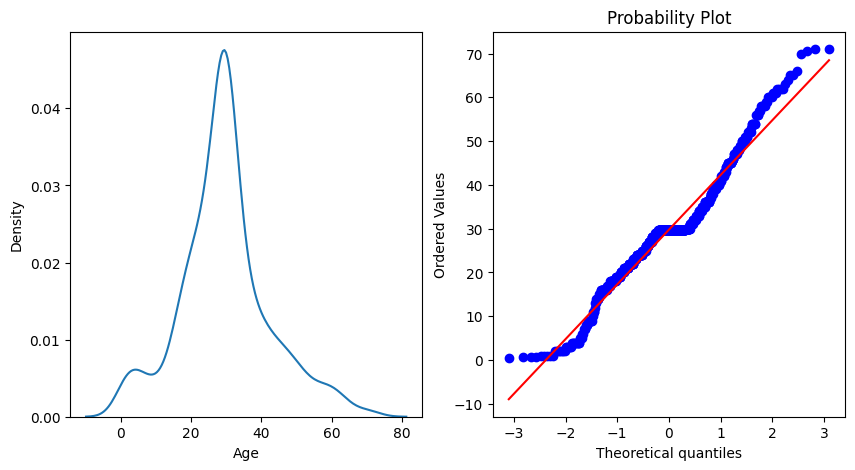

In [608]:

fig,ax = plt.subplots(1,2 , figsize=(10,5))
sns.kdeplot(x_train['Age'] , ax = ax[0])
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.show()

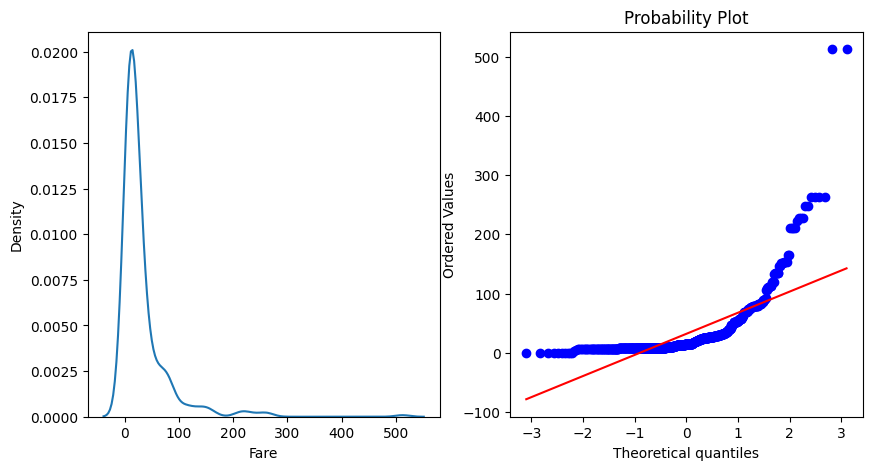

In [609]:
fig,ax = plt.subplots(1,2 , figsize=(10,5))
sns.kdeplot(x_train['Fare'] , ax = ax[0])
stats.probplot(x_train['Fare'], dist="norm", plot=plt)

plt.show()

In [610]:
trf =FunctionTransformer(np.log1p)
x_train['Fare'] = trf.fit_transform(x_train[['Fare']])
x_test['Fare'] = trf.transform(x_test[['Fare']])

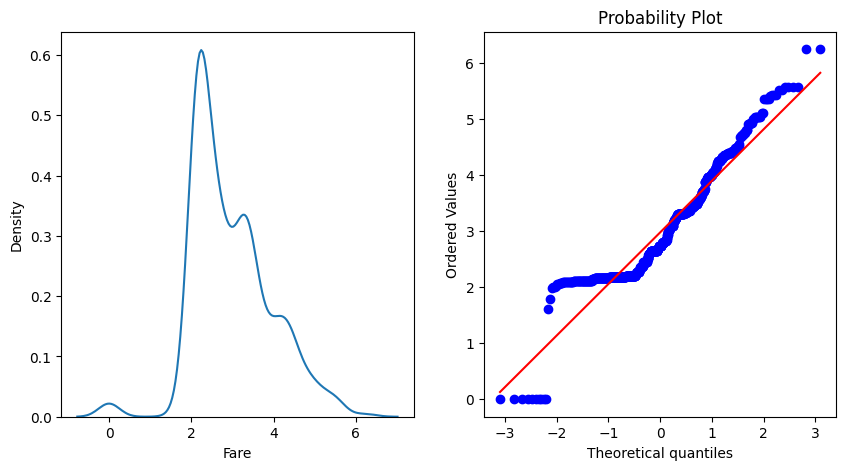

In [611]:
fig,ax = plt.subplots(1,2 , figsize=(10,5))
sns.kdeplot(x_train['Fare'] , ax = ax[0])
stats.probplot(x_train['Fare'], dist="norm", plot=plt)

plt.show()

In [612]:
sc = StandardScaler()
sc.fit(x_train[['Age' , 'Fare']])
x_train[['Age' , 'Fare']] = sc.transform(x_train[['Age' , 'Fare']])
x_test[['Age' , 'Fare']] = sc.transform(x_test[['Age' , 'Fare']])



In [613]:
x_train_trf = pd.DataFrame(x_train,columns=final_columns)
x_test_trf = pd.DataFrame(x_test,columns=final_columns)
x_train_trf.head()

,Title_Mr,Title_Mrs,Title_Other,PassengerId,Pclass,Age,Fare,family_size,missing_age,Sex_male,Embarked_Q,Embarked_S
0,0.0,0.0,1.0,31,1,0.804940,0.400603,2,False,1.0,0.0,0.0
1,0.0,0.0,0.0,11,3,-2.027103,-0.105280,1,False,0.0,0.0,1.0
2,1.0,0.0,0.0,874,3,1.355615,-0.702005,2,False,1.0,0.0,1.0
3,0.0,0.0,1.0,183,3,-1.633763,0.526172,2,False,1.0,0.0,1.0
4,1.0,0.0,0.0,877,3,-0.768417,-0.617151,2,False,1.0,0.0,1.0


# applying regression

In [615]:
x.drop(columns=['PassengerId'], inplace=True)
clf = LogisticRegression(max_iter = 1000)
clf.fit(x_train_trf , y_train)
y_pred = clf.predict(x_test_trf)
accuracy_score(y_test , y_pred)
np.mean(cross_val_score(clf , x_train_trf , y_train , cv = 15 , scoring = 'accuracy'))

np.float64(0.8145390070921986)